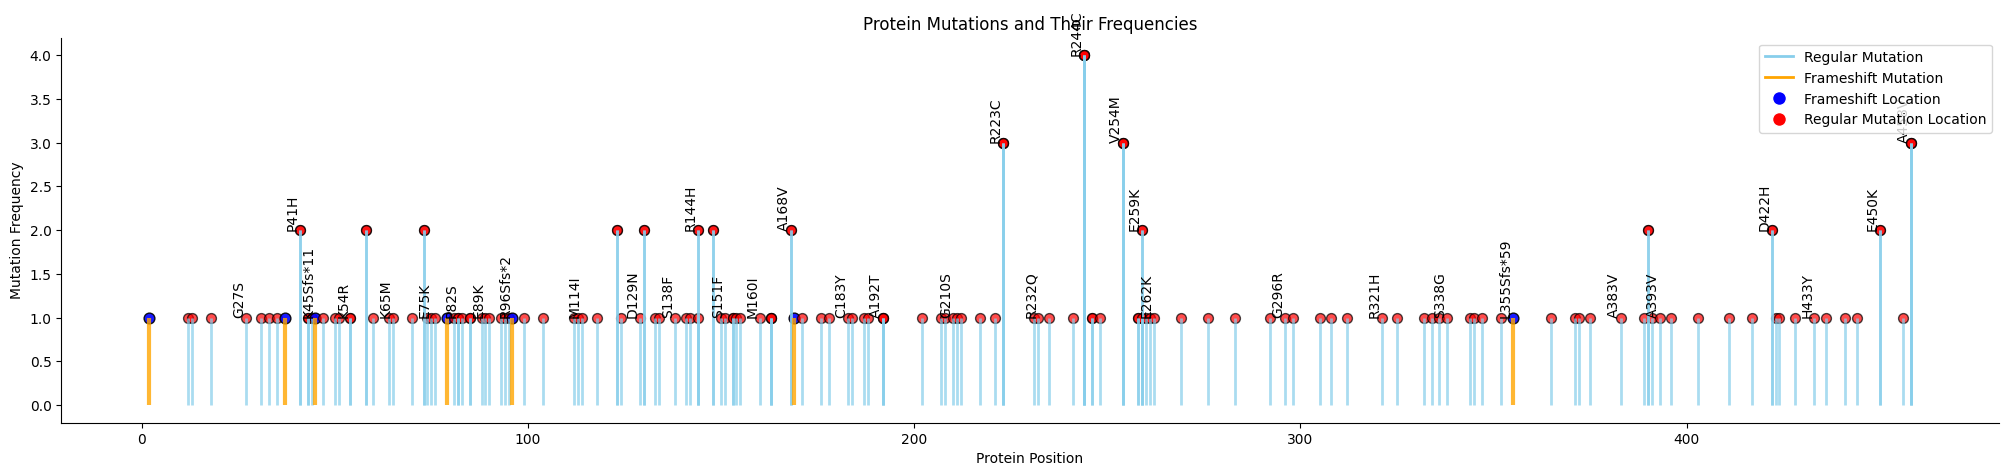

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import regex as re
from matplotlib.lines import Line2D

# Load data and calculate frequencies
data = pd.read_csv('mutated_dataset.csv')
freq = data['Protein Change'].value_counts()

# Create figure and axis with increased size
fig, ax = plt.subplots(figsize=(25, 5))

# Counter for mutation labeling
mutation_label_counter = 0

# Iterate over individual mutations
for index, row in data.iterrows():
    mutation = row['Protein Change']
    if pd.isnull(mutation):  # ignore NaN values
        continue
    mutation = str(mutation)
    
    if 'Fusion' not in mutation and '_splice' not in mutation:  # Ignore fusion and splice mutations
        mutation_freq = freq.get(mutation, 0)  # Get the frequency of the mutation
        mutation_label_counter += 1  # Increment the mutation label counter

        if 'fs' in mutation:  # Frameshift mutation
            pos_str = ''.join(filter(str.isdigit, mutation.split('fs')[0]))
            if pos_str:
                pos = int(pos_str)
                ax.vlines(pos, ymin=0, ymax=mutation_freq, color='orange', alpha=0.8, linewidth=3)
                ax.scatter(pos, mutation_freq, color='blue', s=60, edgecolor='k', alpha=0.9)
        else:  # Other mutations
            match = re.match(r'([A-Za-z])(\d+)([A-Za-z])', mutation)
            if match:
                pos = int(match.group(2))
                ax.vlines(pos, ymin=0, ymax=mutation_freq, color='skyblue', alpha=0.7, linewidth=2)
                ax.scatter(pos, mutation_freq, color='red', s=50, edgecolor='k', alpha=0.7)

        # Add labels only for every i th mutation to avoid clutter
        i = 5
        if mutation_label_counter % i == 0:
            ax.text(pos, mutation_freq, mutation, rotation=90, ha='right', va='bottom')

legend_elements = [Line2D([0], [0], color='skyblue', lw=2, label='Regular Mutation'),
                   Line2D([0], [0], color='orange', lw=2, label='Frameshift Mutation'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Frameshift Location'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Regular Mutation Location')]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xlabel('Protein Position')
ax.set_ylabel('Mutation Frequency')
ax.set_title('Protein Mutations and Their Frequencies')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


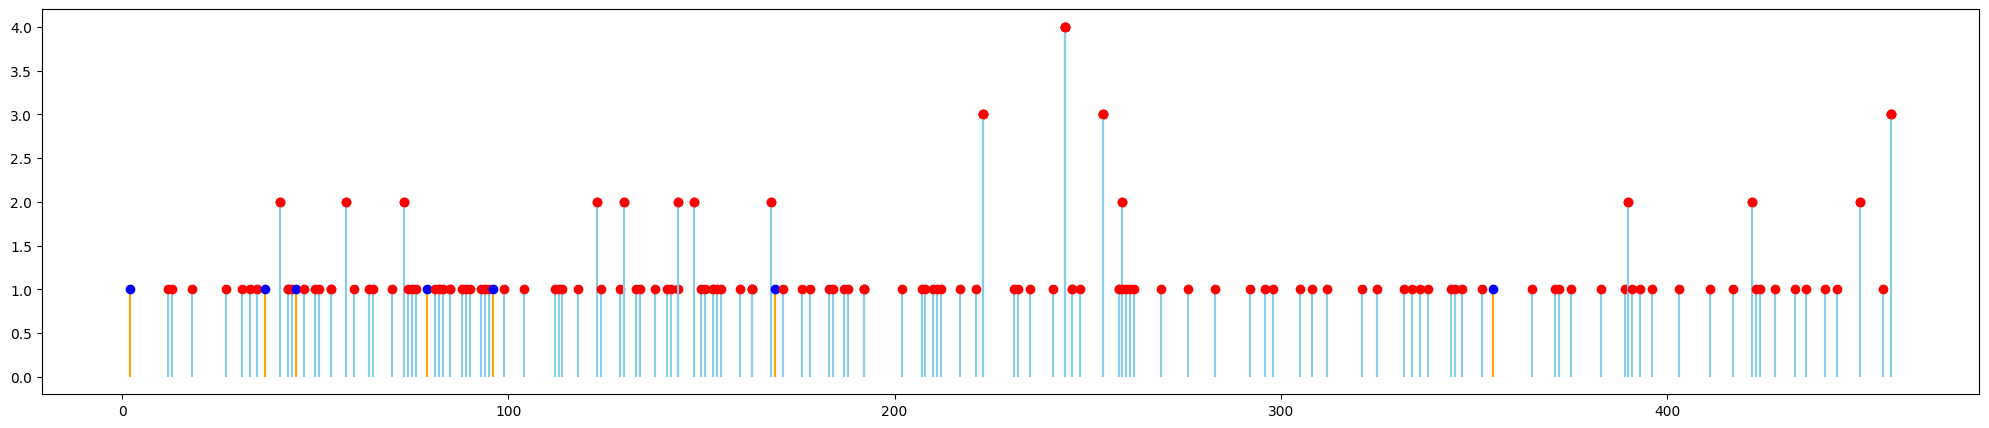

In [33]:
# Create a new figure for the stem plot
fig_stem, ax_stem = plt.subplots(figsize=(25, 5))
for index, row in data.iterrows():
    mutation = row['Protein Change']
    if pd.isnull(mutation): 
        continue
    mutation = str(mutation)
    
    if 'Fusion' not in mutation and '_splice' not in mutation:  
        mutation_freq = freq.get(mutation, 0) 

        if 'fs' in mutation:
            pos_str = ''.join(filter(str.isdigit, mutation.split('fs')[0]))
            if pos_str:
                pos = int(pos_str)
                ax_stem.stem([pos], [mutation_freq], linefmt='orange', markerfmt='bo', basefmt=" ")
        else: 
            match = re.match(r'([A-Za-z])(\d+)([A-Za-z])', mutation)
            if match:
                pos = int(match.group(2))
                ax_stem.stem([pos], [mutation_freq], linefmt='skyblue', markerfmt='ro', basefmt=" ")

